# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

чтобы при каждом новом запуске кода рандомные значения не изменялись (рассчитывались по тому же алгоритму)

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [176]:
import pandas as pd

In [177]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [178]:
print('30 случайных')
display(df_train.sample(30))

print('\nпервые 5')
display(df_test.head())
print('\nпоследние 5')
display(df_test.tail())

display(df_train.info())
display(df_test.info())
print('\nназвания колонок трейна, для которых есть пропущенные значения')
print(df_train.columns[df_train.isna().sum() > 0].tolist())
print('\nназвания колонок теста, для которых есть пропущенные значения')
print(df_test.columns[df_test.isna().sum() > 0].tolist())

print('\nявных дубликатов в трейне:',df_train.duplicated().sum())
print('\nявных дубликатов в тесте:',df_test.duplicated().sum())

30 случайных


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0



первые 5


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0



последние 5


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


None


названия колонок трейна, для которых есть пропущенные значения
['mileage', 'engine', 'max_power', 'torque', 'seats']

названия колонок теста, для которых есть пропущенные значения
['mileage', 'engine', 'max_power', 'torque', 'seats']

явных дубликатов в трейне: 985

явных дубликатов в тесте: 62



Выводы
1) используя случайные/верхние/нижние строки можно сделать выводы о структуре данных, названиях форматах и типах признаков, но нельзя увидеть зависимости, распределение, отсутствие пропусков и дубликатов
2) метода duplicated не всегда бывает достаточно, тк он видит только явные
дубликаты.

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [179]:
num = df_train.select_dtypes(include="number").columns

df_train[num] = df_train[num].fillna(df_train[num].median())
df_test[num]  = df_test[num].fillna(df_train[num].median())

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [180]:
pri = [col for col in df_train.columns if col != 'selling_price']
print('объекты с одинаковым признаковым описанием:', df_train.duplicated(subset=pri, keep=False).sum())

display(df_train[df_train.duplicated(subset=pri, keep=False)])

df_train = df_train.drop_duplicates(subset=pri, keep='first')

df_train = df_train.reset_index(drop=True)

объекты с одинаковым признаковым описанием: 1799


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [181]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [182]:
for col in ['mileage', 'engine', 'max_power']:
  df_train[col] = df_train[col].str.split().str[0]
  df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

  df_test[col] = df_test[col].str.split().str[0]
  df_test[col] = pd.to_numeric(df_test[col], errors='coerce')

df_train = df_train.drop(columns=['torque'])
df_test  = df_test.drop(columns=['torque'])

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [183]:
for col in ['engine', 'seats']:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col]  = df_test[col].fillna(df_train[col].median())

df_train['engine'] = df_train['engine'].astype(int)
df_train['seats']  = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats']  = df_test['seats'].astype(int)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [184]:
display(df_train.describe(include='number'))
display(df_test.describe(include='number'))

display(df_train.describe(include='object'))
display(df_test.describe(include='object'))

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5654.000000,5840.000000,5656.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.432842,1429.448973,88.103070,5.426712
std,4.095622,5.354320e+05,6.007114e+04,4.051002,485.662834,32.131943,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.800000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000,1000.00000,981.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338206,1454.87600,91.015627,5.403000
std,4.012149,7.585539e+05,48486.218662,3.989872,521.99574,35.207383,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.500000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.00000,83.100000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


Вывод
Распределение как числовых, так и категориальных признаков в train и test похожее, можно проводить дальшейшее обучение модели.

In [185]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

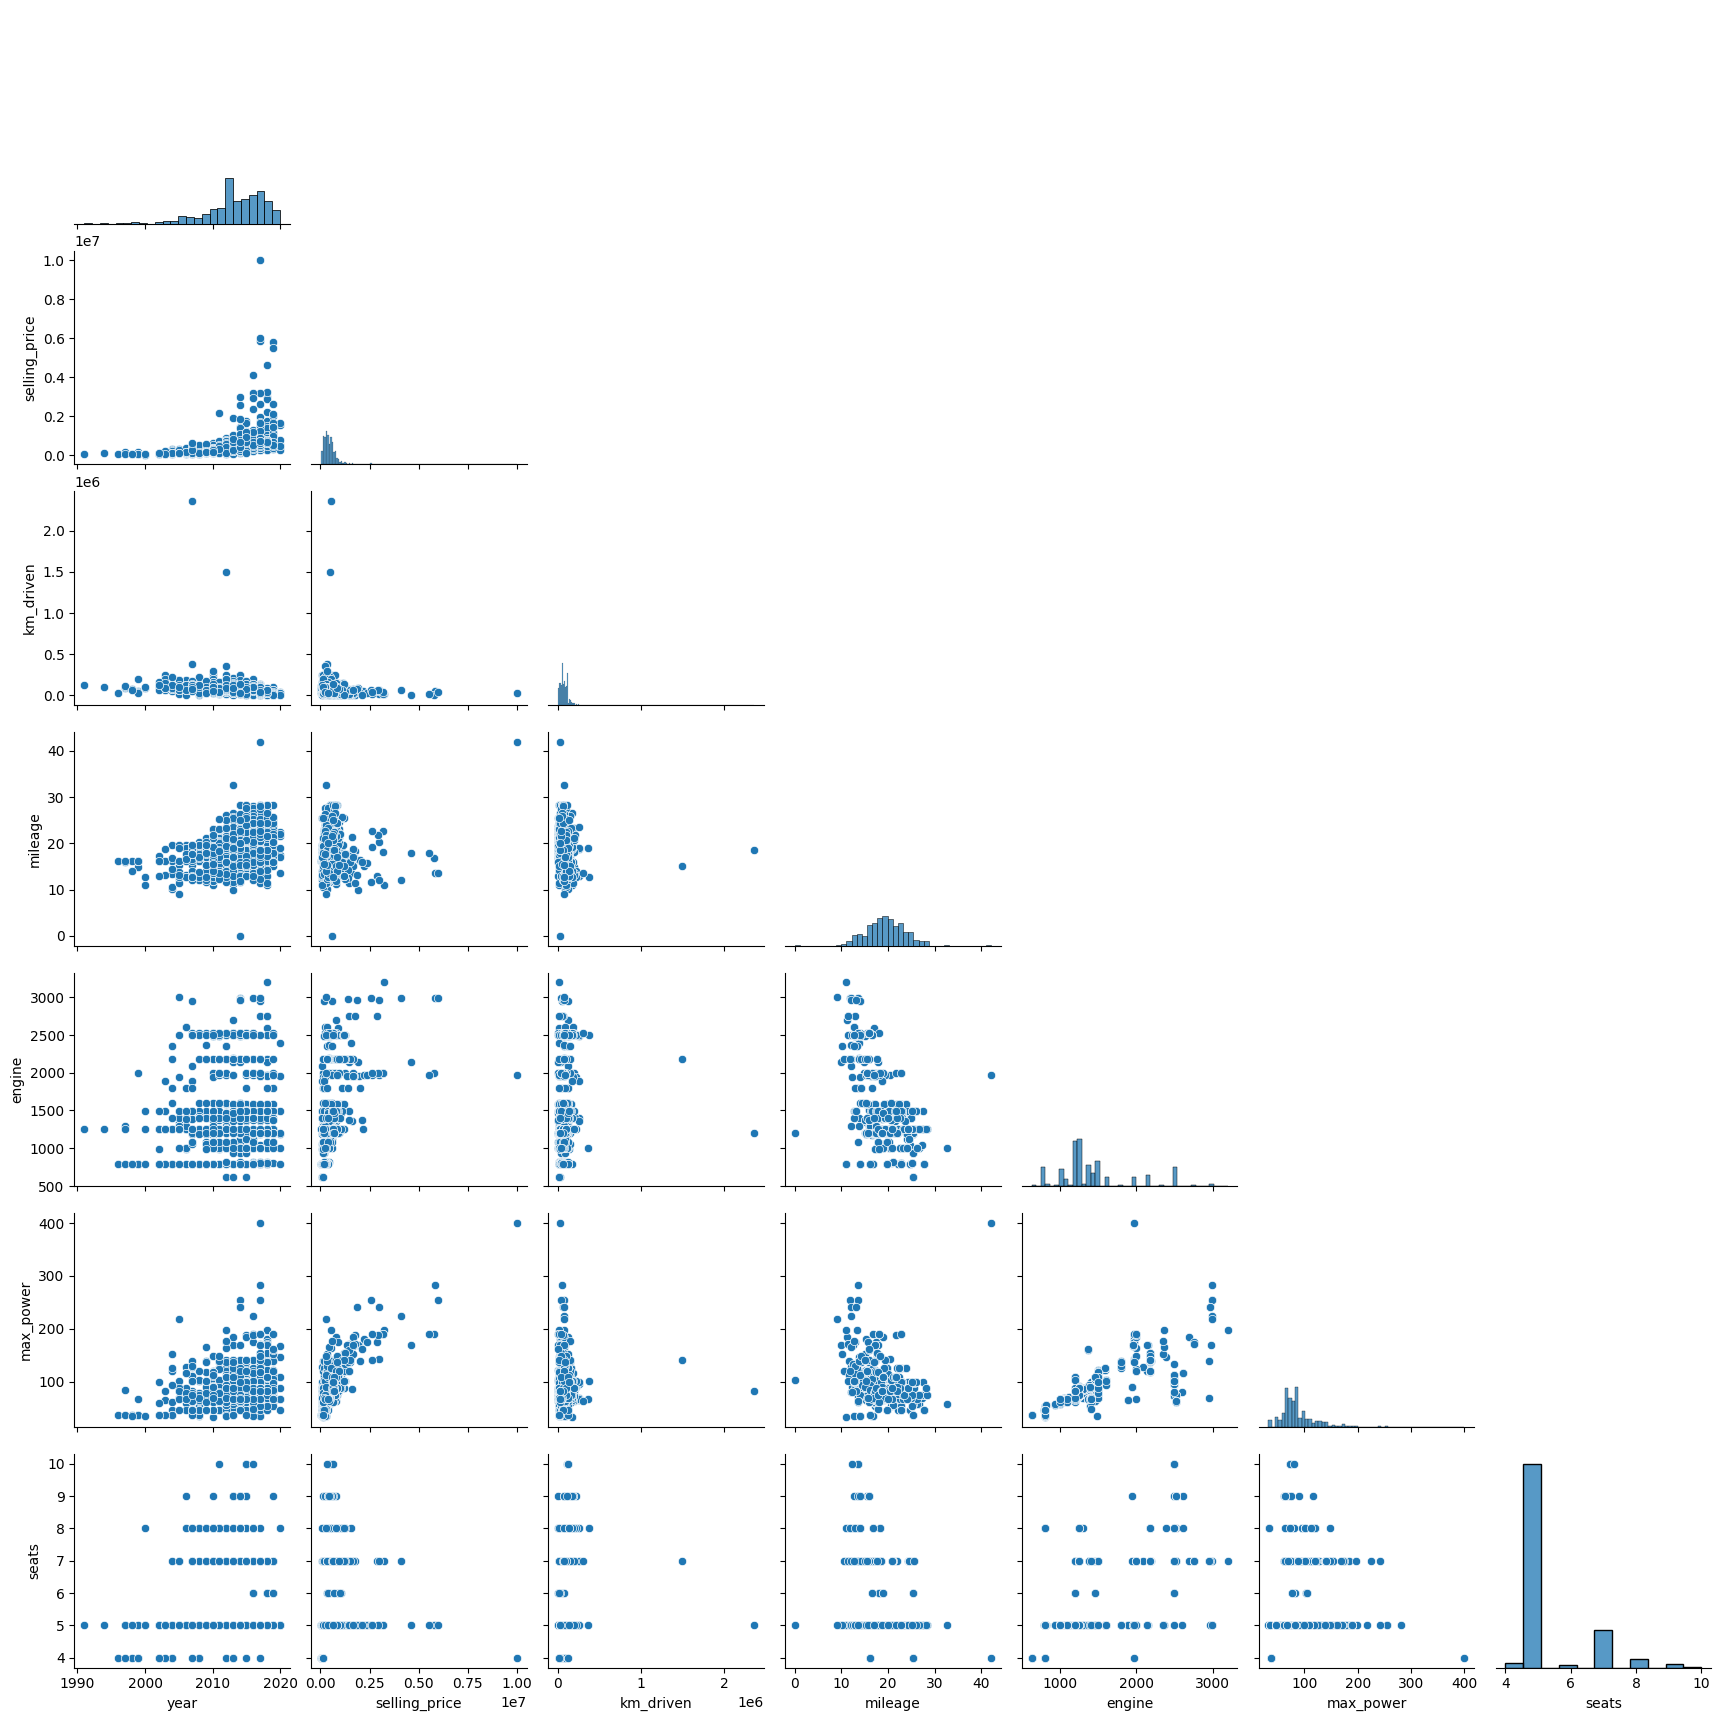

In [186]:
import seaborn as sns

num = df_train.select_dtypes(include='number').columns

sns.pairplot(df_train[num].sample(1000, random_state=42), corner=True, diag_kind='hist') # Посмотрел в LLM
plt.show()

Вывод:
1) Об очевидной взаимосвязи признаков и ЦП сказать нельзя. Самая явная зависимость видна между ЦП и max_power
2) Положительной кореляцией обладают max_power и engine

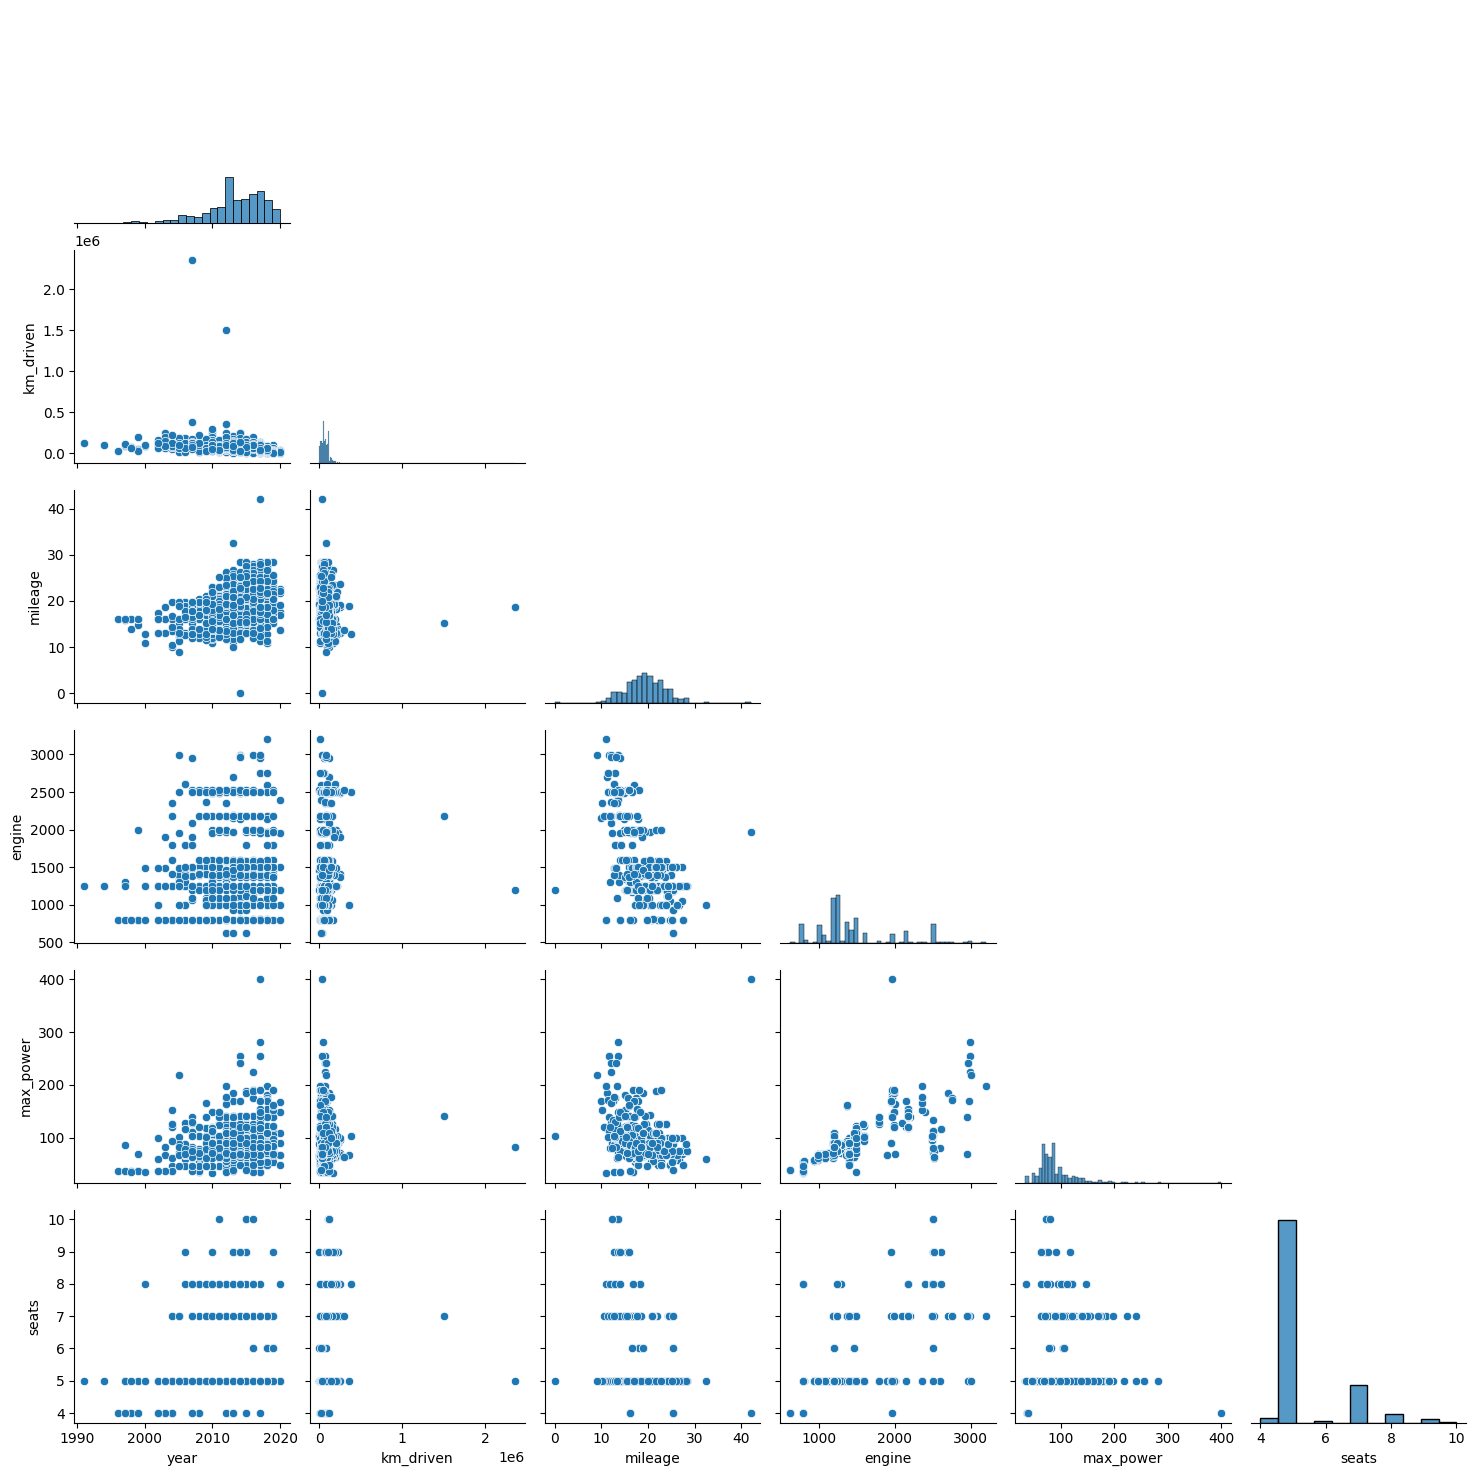

In [187]:
num2 = df_test.select_dtypes(include='number').columns
num2 = [col for col in num2 if col != 'selling_price']

sns.pairplot(df_train[num2].sample(1000, random_state=42), corner=True, diag_kind='hist')
plt.show()

Совокупности при разделении на трейн и тест оказались похожими

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.363360,0.002819,0.157376,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.105939,0.447672,0.695593,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.183538,0.229766,0.026676,0.192328
mileage,0.363360,-0.105939,-0.183538,1.000000,-0.574404,-0.374699,-0.452687
engine,0.002819,0.447672,0.229766,-0.574404,1.000000,0.680806,0.652172
max_power,0.157376,0.695593,0.026676,-0.374699,0.680806,1.000000,0.242541
seats,0.041178,0.149953,0.192328,-0.452687,0.652172,0.242541,1.000000


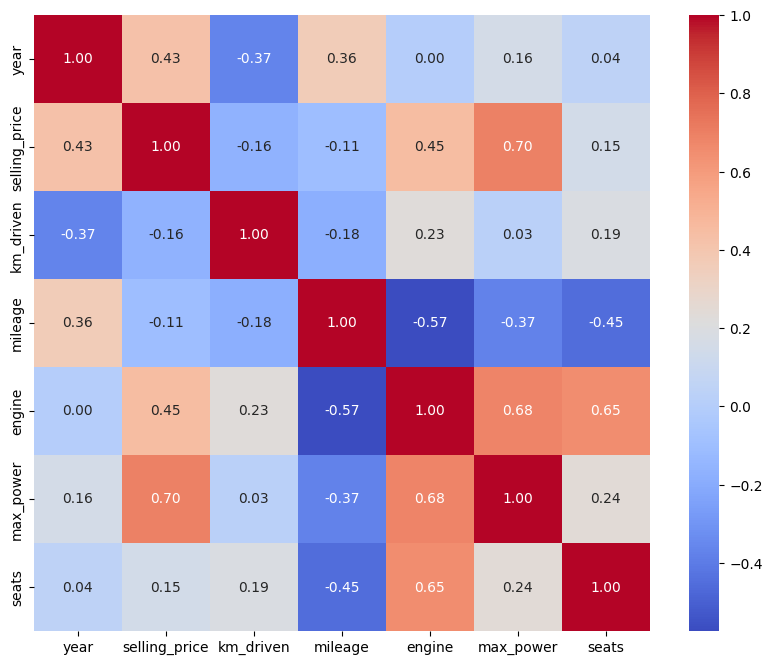

In [188]:
corr = df_train[num].corr(method='pearson')
display(corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True) # Посмотрел в LLM
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Вывод:
1)Наименее скорелированы year и engine
2)Между selling_price и max_power, engine и max_power, engine и seats есть довольно сильная положительная линейная зависимость  
3) Правильно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи (отрицательная корреляция)

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [189]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [190]:
df_train_num = df_train[num].copy()
df_test_num  = df_test[num].copy()

y_train = df_train_num['selling_price']
X_train = df_train_num.drop(columns=['selling_price'])

In [191]:
y_test = df_test_num['selling_price']
X_test = df_test_num.drop(columns=['selling_price'])

In [192]:
X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [193]:
X_train.isna().sum()

,0
year,0
km_driven,0
mileage,0
engine,0
max_power,0
seats,0


In [194]:
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.preprocessing import *

mdl = LinearRegression()
mdl.fit(X_train, y_train)
y_trainp = mdl.predict(X_train)
y_testp  = mdl.predict(X_test)

print('R2 train:', r2_score(y_train, y_trainp))
print('MSE train:', mean_squared_error(y_train, y_trainp))
print('R2 test :', r2_score(y_test, y_testp))
print('MSE test:', mean_squared_error(y_test, y_testp))

R2 train: 0.5922591702157316
MSE train: 116874153930.02855
R2 test : 0.5941419794788428
MSE test: 233298779730.45486


Показатели r2 в train и test практически одинаковые и в пределах нормы, значит переобучения нет.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [195]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_trains = s.fit_transform(X_train)
X_tests  = s.transform(X_test)
mdl = LinearRegression()
mdl.fit(X_trains, y_train)
y_trainps = mdl.predict(X_trains)
y_testps  = mdl.predict(X_tests)

print('R2 train:', r2_score(y_train, y_trainps))
print('MSE train:', mean_squared_error(y_train, y_trainps))
print('R2 test :', r2_score(y_test, y_testps))
print('MSE test:', mean_squared_error(y_test, y_testps))

R2 train: 0.5922591702157303
MSE train: 116874153930.02892
R2 test : 0.594141979478852
MSE test: 233298779730.44965


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [196]:
import pandas as pd
import numpy as np

coef = pd.Series(mdl.coef_, index=X_train.columns)

print(coef.abs().idxmax())

max_power


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [197]:
from sklearn.linear_model import Lasso

mdl = Lasso()
mdl.fit(X_trains, y_train)
y_trainpl = mdl.predict(X_trains)
y_testpl  = mdl.predict(X_tests)

print('R2 train:', r2_score(y_train, y_trainpl))
print('MSE train:', mean_squared_error(y_train, y_trainpl))
print('R2 test :', r2_score(y_test, y_testpl))
print('MSE test:', mean_squared_error(y_test, y_testpl))

R2 train: 0.5922591701804456
MSE train: 116874153940.1429
R2 test : 0.5941408124026637
MSE test: 233299450599.16928


Вывод: Lasso не дало ощутимого прироста в качестве модели

In [198]:
w = mdl.coef_
print('занулилось коэффицентов:', np.sum(w == 0))

занулилось коэффицентов: 0


Вывод: Ни один из коэффицентов не был занулен, тк либо каждый из них вносит весомый вклад, либо регуляризация слишком слабая.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [199]:
from sklearn.model_selection import GridSearchCV

mdl = Lasso()

grid = {
    'alpha': np.logspace(-4, 1, 20)
} # Посмотрел в LLM

gs = GridSearchCV(
    mdl,
    grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
) # Посмотрел в LLM

gs.fit(X_trains, y_train)
best_mdl = gs.best_estimator_
w = best_mdl.coef_

In [200]:
print('Сколько грид-сёрчу пришлось обучать моделей:', len(grid['alpha']) * 10)
print('Лучший коэффицент регуляризации:', gs.best_params_['alpha'])
print('Весов занулилось:', np.sum(w == 0))

Сколько грид-сёрчу пришлось обучать моделей: 200
Лучший коэффицент регуляризации: 10.0
Весов занулилось: 0


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [201]:
from sklearn.linear_model import ElasticNet

mdl = ElasticNet()

grid = {
    'alpha': np.logspace(-4, 1, 10),
    'l1_ratio': np.linspace(0.1, 0.9, 9)
}

gs = GridSearchCV(
    mdl,
    grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

gs.fit(X_trains, y_train)

best_mdl = gs.best_estimator_

print('Сколько грид-сёрчу пришлось обучать моделей:', len(grid['alpha']) * len(grid['l1_ratio']) * 10)
print('Гиперпараметры лучшей модели: alpha -', gs.best_params_['alpha'], '; l1_ratio -',gs.best_params_['l1_ratio'])

Сколько грид-сёрчу пришлось обучать моделей: 900
Гиперпараметры лучшей модели: alpha - 0.21544346900318845 ; l1_ratio - 0.30000000000000004


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [202]:
X_train_cat = df_train.drop(columns=['name', 'selling_price'])
X_test_cat  = df_test.drop(columns=['name', 'selling_price'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [203]:
assert X_train_cat.shape == (5840, 10)

In [204]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [205]:
X_tr = X_train_cat.copy()
X_te = X_test_cat.copy()

cols = X_tr.select_dtypes(include='object').columns.tolist()
cols.append('seats')

X_tr = pd.get_dummies(X_tr, columns=cols, drop_first=True)
X_te = pd.get_dummies(X_te, columns=cols, drop_first=True)

X_tr, X_te = X_tr.align(X_te, join='left', axis=1, fill_value=0)

X_tr = X_tr.fillna(0)
X_te = X_te.fillna(0)

s = StandardScaler(with_mean=False)
X_trs = s.fit_transform(X_tr)
X_tes = s.transform(X_te)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [206]:
mdl = Ridge()
grid = {
    'alpha': np.logspace(-4, 4, 30)
}

gs = GridSearchCV(
    mdl,
    grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

gs.fit(X_trs, y_train)
best_mdl = gs.best_estimator_

y_trainpr = best_mdl.predict(X_trs)
y_testpr  = best_mdl.predict(X_tes)

print('R2 train:', r2_score(y_train, y_trainpr))
print('MSE train:', mean_squared_error(y_train, y_trainpr))
print('R2 test :', r2_score(y_test, y_testpr))
print('MSE test:', mean_squared_error(y_test, y_testpr))

R2 train: 0.6387200814729932
MSE train: 103556675528.65385
R2 test : 0.5908076573515995
MSE test: 235215443302.8915


Нет, значительно улучшить качество прогноза не удалось

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [207]:
def business_metric(y_true, y_pred):
    e = abs(y_pred - y_true) / y_true
    return (e <= 0.1).mean()

print('Обычная линейная:', business_metric(y_test, y_testp))
print('Со стандартизацией:', business_metric(y_test, y_testps))
print('Lasso:', business_metric(y_test, y_testpl))
print('Ridge:', business_metric(y_test, y_testpr))


Обычная линейная: 0.227
Со стандартизацией: 0.227
Lasso: 0.227
Ridge: 0.236


Вывод: Лучшая модель - это Ridge, тк она дает наибольшую долю прогнозов, отличающихся от реальных цен на авто не более чем на 10% (в одну или другую сторону)


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [214]:
import pickle

ohe = X_tr.columns.tolist()
ohes = cols

p = {
    'model': best_mdl,
    'scaler': s,
    'ohe_cols': ohe,
    'ohe_src_cols': ohes
}

with open('my.pkl', 'wb') as f:
    pickle.dump(p, f)

# **Часть 6 | Оформление репозитория и оценка сервиса (2 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.